In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [2]:
database = 'UWMadisondatabase.sqlite3'

In [3]:
conn = sqlite3.connect(database)

In [4]:
cursor = conn.cursor()

In [5]:
tables = pd.read_sql("""SELECT name FROM sqlite_master
                        WHERE type= 'table'; """,conn)
tables

,name
0,sections
1,instructors
2,course_offerings
3,subject_memberships
4,courses
5,rooms
6,teachings
7,subjects
8,schedules
9,grade_distributions


So, we have 10 tables in all. 

# Analyzing the Subjects table

In [6]:
subjects = pd.read_sql("""SELECT * FROM subjects;""", conn)
subjects

,code,name,abbreviation
0,908,Soil Science,SOIL SCI
1,350,ENGLISH,ENGLISH
2,351,English as a Second Language,ESL
3,230,Human Development and Family Studies,HDFS
4,352,English,ENGL
...,...,...,...
195,348,Engineering Professional Development,E P D
196,106,Afro-American Studies,AFROAMER
197,228,Chicana/o and Latina/o Studies,CHICLA
198,108,Agricultural and Applied Economics,A A E


In [7]:
order_subjects = pd.read_sql("""SELECT * FROM subjects
                                ORDER BY code; """, conn)
order_subjects

,code,name,abbreviation
0,102,Air Force Aerospace Studies,A F AERO
1,104,African Languages and Literature,AFRICAN
2,106,Afro-American Studies,AFROAMER
3,108,Agricultural and Applied Economics,A A E
4,112,Biological Systems Engineering,BSE
...,...,...,...
195,960,WILDLIFE ECOLOGY,WL ECOL
196,963,Gender and Women’s Studies,GEN&WS
197,970,Zoology,ZOOLOGY
198,SAB,International Academic Programs - Study Abroad,STDYABRD


How many subjects are English based?

In [8]:
eng_sub = pd.read_sql("""SELECT * FROM subjects
                         WHERE name LIKE '%english%';""", conn)
eng_sub

,code,name,abbreviation
0,350,ENGLISH,ENGLISH
1,351,English as a Second Language,ESL
2,352,English,ENGL


How many subjects are Science based?

In [9]:
sci_sub = pd.read_sql("""SELECT * FROM subjects
                         WHERE name LIKE '%science%' ;""", conn)
sci_sub

,code,name,abbreviation
0,908,Soil Science,SOIL SCI
1,120,Life Sciences Communication,LSC
2,242,Actuarial Science,ACT SCI
3,252,Communication Sciences and Disorders,CS&D
4,810,Population Health Sciences,POP HLTH
5,934,Comparative Biosciences,COMP BIO
6,938,Surgical Sciences,SURG SCI
7,939,Therapeutic Science (Department of Kinesiology),THER SCI
8,266,Computer Sciences,COMP SCI
9,702,Ophthalmology and Visual Sciences,OPHTHALM


Which subjects are economics based?

In [10]:
eco_sub = pd.read_sql("""SELECT * FROM subjects
                         WHERE name LIKE '%economics%';""", conn)
eco_sub

,code,name,abbreviation
0,239,Real Estate and Urban Land Economics,REAL EST
1,296,Economics,ECON
2,108,Agricultural and Applied Economics,A A E


What all Engineering subjects are there?

In [11]:
engg_sub = pd.read_sql ("""SELECT * FROM subjects
                           WHERE name LIKE '%engineering%';""", conn)
engg_sub

,code,name,abbreviation
0,112,Biological Systems Engineering,BSE
1,240,Civil and Environmental Engineering,CIV ENGR
2,490,Industrial and Systems Engineering,I SY E
3,496,Interdisciplinary Courses (Engineering),INTEREGR
4,612,Mechanical Engineering,M E
5,636,Materials Science and Engineering,M S & E
6,418,Geological Engineering,G L E
7,320,Electrical and Computer Engineering,E C E
8,684,Nuclear Engineering,N E
9,207,Biomedical Engineering,B M E


Which subjects are based on Literature?

In [12]:
lit_sub = pd.read_sql("""SELECT * FROM subjects
WHERE name LIKE '%literature%'; """, conn)
lit_sub

,code,name,abbreviation
0,260,Comparative Literature,COMP LIT
1,295,East Asian Languages and Literature,E ASIAN
2,551,Literature in Translation,LITTRANS
3,104,African Languages and Literature,AFRICAN


Which subjects are Medicine based?

In [13]:
med_sub = pd.read_sql("""SELECT * FROM subjects
WHERE name LIKE '%medicine%'; """, conn)
med_sub

,code,name,abbreviation
0,370,Family Medicine,FAM MED
1,704,Pathology and Laboratory Medicine,PATH
2,840,Rehabilitation Medicine,RHAB MED
3,623,Medical Sciences - Veterinary Medicine,MED SC-V
4,632,Medicine,MEDICINE
5,330,Emergency Medicine,EMER MED


# Analyzing the courses table

In [14]:
courses = pd.read_sql("""SELECT * FROM courses;""", conn)
courses

,uuid,name,number
0,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,Cooperative Education Program,1
1,c070a84f-648f-351d-9499-5d0e30ad02cc,Cooperative Education/Co-op in Life Sciences C...,1
2,e6b4b7ae-0e0b-3aa5-9d77-7fcd90c9cfa3,Cooperative Education Program,1
3,8f63bde1-ff7f-3fe7-9901-862908bf134c,Workshop in Dance Activity,1
4,f3541888-584a-3923-9ce7-6341ff3d84a1,Cooperative Education/Co-op in Agricultural & ...,1
...,...,...,...
9301,4a7f3d9d-f2e5-3df2-8dee-2c2d02ed9098,Conservation Planning,972
9302,1220244c-2bbf-3169-8eb0-6a2da36f40f6,"Optimizing Value, Quality and Safety in Health...",973
9303,516f637c-a244-3df0-ba3f-f11ce650543d,Patient Education as a Strategy for Advocacy,974
9304,fbe0838f-9469-3d83-ad85-91ba5aabd1a3,Multidisciplinary Approaches to Colon Cancer P...,975


In [15]:
course_offerings = pd.read_sql("""SELECT * FROM course_offerings;""", conn)
course_offerings

,uuid,course_uuid,term_code,name
0,uuid,course_uuid,term_code,name
1,344b3ebe-da7e-314c-83ed-9425269695fd,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,1092,Cooperative Education Prog
2,f718e6cd-33f0-3c14-a9a6-834d9c3610a8,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,1082,Cooperative Education Prog
3,ea3b717c-d66b-30dc-8b37-964d9688295f,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,1172,Cooperative Education Prog
4,075da420-5f49-3dd0-93df-13e3c152e1b1,a3e3e1c3-543d-3bb5-ae65-5f2aec4ad1de,1114,Cooperative Education Prog
...,...,...,...,...
81448,3573e335-e7be-33a6-b023-8704b3acc93b,4a7f3d9d-f2e5-3df2-8dee-2c2d02ed9098,1182,Conservation Planning
81449,5d437083-a1d0-38b8-aa70-ec3564da39a6,1220244c-2bbf-3169-8eb0-6a2da36f40f6,1182,null
81450,13278922-0726-3823-abda-dc14df03d8a6,516f637c-a244-3df0-ba3f-f11ce650543d,1182,Patient Ed. as Advocacy Strat.
81451,fd039fe4-32ec-31dd-a142-c7db54df784b,fbe0838f-9469-3d83-ad85-91ba5aabd1a3,1182,Multid. Appr. to Colon Cancer


# Finding the Subjects which the courses offered belong to

In [16]:
course_subject =pd.read_sql("""SELECT uuid, term_code, name, subject_code
                               FROM course_offerings 
                               INNER JOIN subject_memberships 
                               ON course_offerings.uuid = subject_memberships.course_offering_uuid ;""", conn)
course_subject

,uuid,term_code,name,subject_code
0,344b3ebe-da7e-314c-83ed-9425269695fd,1092,Cooperative Education Prog,220
1,344b3ebe-da7e-314c-83ed-9425269695fd,1092,Cooperative Education Prog,320
2,344b3ebe-da7e-314c-83ed-9425269695fd,1092,Cooperative Education Prog,346
3,344b3ebe-da7e-314c-83ed-9425269695fd,1092,Cooperative Education Prog,612
4,344b3ebe-da7e-314c-83ed-9425269695fd,1092,Cooperative Education Prog,636
...,...,...,...,...
95309,3573e335-e7be-33a6-b023-8704b3acc93b,1182,Conservation Planning,360
95310,5d437083-a1d0-38b8-aa70-ec3564da39a6,1182,null,936
95311,13278922-0726-3823-abda-dc14df03d8a6,1182,Patient Ed. as Advocacy Strat.,936
95312,fd039fe4-32ec-31dd-a142-c7db54df784b,1182,Multid. Appr. to Colon Cancer,936


In [17]:
course_subjects =pd.read_sql("""SELECT course_offerings.name AS course_name, subject_code, subjects.name AS subject_name
                               FROM course_offerings 
                               INNER JOIN subject_memberships 
                               ON course_offerings.uuid = subject_memberships.course_offering_uuid 
                               INNER JOIN subjects
                               ON subject_memberships.subject_code = subjects.code ;""", conn)
course_subjects

,course_name,subject_code,subject_name
0,Cooperative Education Prog,220,Chemical and Biological Engineering
1,Cooperative Education Prog,320,Electrical and Computer Engineering
2,Cooperative Education Prog,346,Engineering Mechanics and Astronautics
3,Cooperative Education Prog,612,Mechanical Engineering
4,Cooperative Education Prog,636,Materials Science and Engineering
...,...,...,...
95309,Conservation Planning,360,Environmental Studies - Gaylord Nelson Institute
95310,null,936,Surgery
95311,Patient Ed. as Advocacy Strat.,936,Surgery
95312,Multid. Appr. to Colon Cancer,936,Surgery


# Creating a view of the course_subjects table queried above :-

In [18]:
cursor.execute("DROP VIEW IF EXISTS course_subjects")
cursor.execute("""
  CREATE VIEW
  course_subjects (uuid, course_name, subject_code, subject_name)
  AS
  SELECT uuid, course_offerings.name AS course_name, subject_code, subjects.name AS subject_name
                               FROM course_offerings 
                               INNER JOIN subject_memberships 
                               ON course_offerings.uuid = subject_memberships.course_offering_uuid 
                               INNER JOIN subjects
                               ON subject_memberships.subject_code = subjects.code
  """)

# Analyzing the instructors and teachings

In [19]:
instructors = pd.read_sql("""SELECT * FROM instructors;""", conn)
instructors

,id,name
0,id,name
1,761703,JOHN ARCHAMBAULT
2,3677061,STEPHANIE KANN
3,788586,KATHY PREM
4,1600463,KRISTIN KLARKOWSKI
...,...,...
18733,491743,MARY COLLINS
18734,952509,PAUL HUNTER
18735,3644163,MEGAN GUSSICK
18736,5841497,MICHAEL SEMANIK


In [20]:
teachings = pd.read_sql("""SELECT * FROM teachings;""", conn)
teachings

,instructor_id,section_uuid
0,761703,45adf63c-48c9-3659-8561-07556d2d4ddf
1,761703,c6280e23-5e43-3859-893e-540d94993529
2,761703,9395dc21-15d1-3fab-8d1f-6f3fe6114c48
3,3677061,b99e440b-39db-350a-81eb-b6eb1bd8b0bc
4,761703,ca1c841f-41d5-3298-bd25-01c65751f150
...,...,...
315206,5906028,78135ed6-31b3-3973-99d5-fd98ab9afef3
315207,4097737,a1972345-f931-3964-bb62-718d26e79bd4
315208,3296435,50f9cf79-a4e3-3975-a292-b130d3d5d97c
315209,5450446,f9bad9d1-197d-3c55-8199-7f05e640ddb8


The teachings table describes which instructors taught which sections.

In [21]:
instructor_teachings = pd.read_sql("""SELECT *
                                      FROM instructors
                                      INNER JOIN teachings
                                      ON instructors.id = teachings.instructor_id;""", conn)
instructor_teachings

,id,name,instructor_id,section_uuid
0,761703,JOHN ARCHAMBAULT,761703,45adf63c-48c9-3659-8561-07556d2d4ddf
1,761703,JOHN ARCHAMBAULT,761703,c6280e23-5e43-3859-893e-540d94993529
2,761703,JOHN ARCHAMBAULT,761703,9395dc21-15d1-3fab-8d1f-6f3fe6114c48
3,3677061,STEPHANIE KANN,3677061,b99e440b-39db-350a-81eb-b6eb1bd8b0bc
4,761703,JOHN ARCHAMBAULT,761703,ca1c841f-41d5-3298-bd25-01c65751f150
...,...,...,...,...
315206,5906028,ALICIA BARCEINAS CRUZ,5906028,78135ed6-31b3-3973-99d5-fd98ab9afef3
315207,4097737,MARGARET SCHWARZE,4097737,a1972345-f931-3964-bb62-718d26e79bd4
315208,3296435,SARAH SULLIVAN,3296435,50f9cf79-a4e3-3975-a292-b130d3d5d97c
315209,5450446,EVIE CARCHMAN,5450446,f9bad9d1-197d-3c55-8199-7f05e640ddb8


In [22]:
sections = pd.read_sql("""SELECT * from sections;""", conn)
sections

,uuid,course_offering_uuid,section_type,number,room_uuid,schedule_uuid
0,"uuid,course_offering_uuid,section_type,number,...",None,None,None,None,None
1,"45adf63c-48c9-3659-8561-07556d2d4ddf"",""344b3eb...",None,None,None,None,None
2,"c6280e23-5e43-3859-893e-540d94993529"",""f718e6c...",None,None,None,None,None
3,"9395dc21-15d1-3fab-8d1f-6f3fe6114c48"",""ea3b717...",None,None,None,None,None
4,"b99e440b-39db-350a-81eb-b6eb1bd8b0bc"",""ea3b717...",None,None,None,None,None
...,...,...,...,...,...,...
370766,78135ed6-31b3-3973-99d5-fd98ab9afef3,3573e335-e7be-33a6-b023-8704b3acc93b,SEM,1,409b3445-80fc-3ca2-a44e-f254ba48d5cd,eaab6f3c-0f7b-36c0-8175-56207644338e
370767,a1972345-f931-3964-bb62-718d26e79bd4,5d437083-a1d0-38b8-aa70-ec3564da39a6,LEC,9,null,739ab54a-17e8-3428-b64a-5b60640a35ff
370768,50f9cf79-a4e3-3975-a292-b130d3d5d97c,13278922-0726-3823-abda-dc14df03d8a6,LEC,7,null,739ab54a-17e8-3428-b64a-5b60640a35ff
370769,f9bad9d1-197d-3c55-8199-7f05e640ddb8,fd039fe4-32ec-31dd-a142-c7db54df784b,LEC,8,null,739ab54a-17e8-3428-b64a-5b60640a35ff


The sections table describes the sections offered by courses for every semester since 2006.

# Finding the instructors and the corresponding sections taught

In [23]:
instructor_sections = pd.read_sql("""SELECT name AS instructor_name, uuid, section_type, course_offering_uuid, room_uuid, schedule_uuid
                                     FROM instructors
                                     INNER JOIN teachings
                                     ON instructors.id = teachings.instructor_id
                                     INNER JOIN sections
                                     ON teachings.section_uuid = sections.uuid;""", conn)
instructor_sections

,instructor_name,uuid,section_type,course_offering_uuid,room_uuid,schedule_uuid
0,JOHN ARCHAMBAULT,45adf63c-48c9-3659-8561-07556d2d4ddf,FLD,344b3ebe-da7e-314c-83ed-9425269695fd,null,f2d66a4d-0c08-3b48-abf6-649fffd7ae90
1,JOHN ARCHAMBAULT,c6280e23-5e43-3859-893e-540d94993529,FLD,f718e6cd-33f0-3c14-a9a6-834d9c3610a8,null,f2d66a4d-0c08-3b48-abf6-649fffd7ae90
2,JOHN ARCHAMBAULT,9395dc21-15d1-3fab-8d1f-6f3fe6114c48,FLD,ea3b717c-d66b-30dc-8b37-964d9688295f,04368a56-c959-3e4b-8b3d-f4cc3538fea5,f2d66a4d-0c08-3b48-abf6-649fffd7ae90
3,STEPHANIE KANN,b99e440b-39db-350a-81eb-b6eb1bd8b0bc,FLD,ea3b717c-d66b-30dc-8b37-964d9688295f,null,f2d66a4d-0c08-3b48-abf6-649fffd7ae90
4,JOHN ARCHAMBAULT,ca1c841f-41d5-3298-bd25-01c65751f150,FLD,ea3b717c-d66b-30dc-8b37-964d9688295f,null,f2d66a4d-0c08-3b48-abf6-649fffd7ae90
...,...,...,...,...,...,...
315206,ALICIA BARCEINAS CRUZ,78135ed6-31b3-3973-99d5-fd98ab9afef3,SEM,3573e335-e7be-33a6-b023-8704b3acc93b,409b3445-80fc-3ca2-a44e-f254ba48d5cd,eaab6f3c-0f7b-36c0-8175-56207644338e
315207,MARGARET SCHWARZE,a1972345-f931-3964-bb62-718d26e79bd4,LEC,5d437083-a1d0-38b8-aa70-ec3564da39a6,null,739ab54a-17e8-3428-b64a-5b60640a35ff
315208,SARAH SULLIVAN,50f9cf79-a4e3-3975-a292-b130d3d5d97c,LEC,13278922-0726-3823-abda-dc14df03d8a6,null,739ab54a-17e8-3428-b64a-5b60640a35ff
315209,EVIE CARCHMAN,f9bad9d1-197d-3c55-8199-7f05e640ddb8,LEC,fd039fe4-32ec-31dd-a142-c7db54df784b,null,739ab54a-17e8-3428-b64a-5b60640a35ff


In [24]:
cursor.execute("DROP VIEW IF EXISTS instructor_sections")
cursor.execute("""
  CREATE VIEW
  instructor_sections (instructor_name, section_type, course_offering_uuid, section_uuid, room_uuid, schedule_uuid)
  AS
  SELECT name AS instructor_name, section_type, course_offering_uuid, section_uuid, room_uuid, schedule_uuid
                                     FROM instructors
                                     INNER JOIN teachings
                                     ON instructors.id = teachings.instructor_id
                                     INNER JOIN sections
                                     ON teachings.section_uuid = sections.uuid ;
  """)

In [25]:
pd.read_sql("""SELECT instructor_name, section_type, section_uuid
FROM instructor_sections;""", conn)

,instructor_name,section_type,section_uuid
0,JOHN ARCHAMBAULT,FLD,45adf63c-48c9-3659-8561-07556d2d4ddf
1,JOHN ARCHAMBAULT,FLD,c6280e23-5e43-3859-893e-540d94993529
2,JOHN ARCHAMBAULT,FLD,9395dc21-15d1-3fab-8d1f-6f3fe6114c48
3,STEPHANIE KANN,FLD,b99e440b-39db-350a-81eb-b6eb1bd8b0bc
4,JOHN ARCHAMBAULT,FLD,ca1c841f-41d5-3298-bd25-01c65751f150
...,...,...,...
315206,ALICIA BARCEINAS CRUZ,SEM,78135ed6-31b3-3973-99d5-fd98ab9afef3
315207,MARGARET SCHWARZE,LEC,a1972345-f931-3964-bb62-718d26e79bd4
315208,SARAH SULLIVAN,LEC,50f9cf79-a4e3-3975-a292-b130d3d5d97c
315209,EVIE CARCHMAN,LEC,f9bad9d1-197d-3c55-8199-7f05e640ddb8


What are the unique types of sections?

In [26]:
pd.read_sql("""SELECT DISTINCT(section_type)
               FROM instructor_sections;""", conn)

,section_type
0,FLD
1,LAB
2,LEC
3,IND
4,DIS
5,SEM


So, the unique section types include lecture, discussion, lab, etc.

In [27]:
instructor_courses = pd.read_sql("""SELECT *
                                    FROM course_subjects
                                    INNER JOIN instructor_sections
                                    ON course_subjects.uuid = instructor_sections.course_offering_uuid; """,conn)
instructor_courses

,uuid,course_name,subject_code,subject_name,instructor_name,section_type,course_offering_uuid,section_uuid,room_uuid,schedule_uuid
0,344b3ebe-da7e-314c-83ed-9425269695fd,Cooperative Education Prog,207,Biomedical Engineering,JOHN ARCHAMBAULT,FLD,344b3ebe-da7e-314c-83ed-9425269695fd,45adf63c-48c9-3659-8561-07556d2d4ddf,null,f2d66a4d-0c08-3b48-abf6-649fffd7ae90
1,344b3ebe-da7e-314c-83ed-9425269695fd,Cooperative Education Prog,220,Chemical and Biological Engineering,JOHN ARCHAMBAULT,FLD,344b3ebe-da7e-314c-83ed-9425269695fd,45adf63c-48c9-3659-8561-07556d2d4ddf,null,f2d66a4d-0c08-3b48-abf6-649fffd7ae90
2,344b3ebe-da7e-314c-83ed-9425269695fd,Cooperative Education Prog,240,Civil and Environmental Engineering,JOHN ARCHAMBAULT,FLD,344b3ebe-da7e-314c-83ed-9425269695fd,45adf63c-48c9-3659-8561-07556d2d4ddf,null,f2d66a4d-0c08-3b48-abf6-649fffd7ae90
3,344b3ebe-da7e-314c-83ed-9425269695fd,Cooperative Education Prog,320,Electrical and Computer Engineering,JOHN ARCHAMBAULT,FLD,344b3ebe-da7e-314c-83ed-9425269695fd,45adf63c-48c9-3659-8561-07556d2d4ddf,null,f2d66a4d-0c08-3b48-abf6-649fffd7ae90
4,344b3ebe-da7e-314c-83ed-9425269695fd,Cooperative Education Prog,346,Engineering Mechanics and Astronautics,JOHN ARCHAMBAULT,FLD,344b3ebe-da7e-314c-83ed-9425269695fd,45adf63c-48c9-3659-8561-07556d2d4ddf,null,f2d66a4d-0c08-3b48-abf6-649fffd7ae90
...,...,...,...,...,...,...,...,...,...,...
364403,3573e335-e7be-33a6-b023-8704b3acc93b,Conservation Planning,360,Environmental Studies - Gaylord Nelson Institute,ALICIA BARCEINAS CRUZ,SEM,3573e335-e7be-33a6-b023-8704b3acc93b,78135ed6-31b3-3973-99d5-fd98ab9afef3,409b3445-80fc-3ca2-a44e-f254ba48d5cd,eaab6f3c-0f7b-36c0-8175-56207644338e
364404,5d437083-a1d0-38b8-aa70-ec3564da39a6,null,936,Surgery,MARGARET SCHWARZE,LEC,5d437083-a1d0-38b8-aa70-ec3564da39a6,a1972345-f931-3964-bb62-718d26e79bd4,null,739ab54a-17e8-3428-b64a-5b60640a35ff
364405,13278922-0726-3823-abda-dc14df03d8a6,Patient Ed. as Advocacy Strat.,936,Surgery,SARAH SULLIVAN,LEC,13278922-0726-3823-abda-dc14df03d8a6,50f9cf79-a4e3-3975-a292-b130d3d5d97c,null,739ab54a-17e8-3428-b64a-5b60640a35ff
364406,fd039fe4-32ec-31dd-a142-c7db54df784b,Multid. Appr. to Colon Cancer,936,Surgery,EVIE CARCHMAN,LEC,fd039fe4-32ec-31dd-a142-c7db54df784b,f9bad9d1-197d-3c55-8199-7f05e640ddb8,null,739ab54a-17e8-3428-b64a-5b60640a35ff


In [28]:
cursor.execute("DROP VIEW IF EXISTS instructor_courses")
cursor.execute("""
  CREATE VIEW
  instructor_courses (uuid, course_name, subject_code, subject_name, instructor_name, section_type, 
  course_offering_uuid, section_uuid, room_uuid, schedule_uuid )
  
  AS
  
  SELECT *
  
                              FROM course_subjects
                              INNER JOIN instructor_sections
                              ON course_subjects.uuid = instructor_sections.course_offering_uuid
  """)

# Which courses are taught by which instructors?

In [29]:
pd.read_sql("""SELECT course_name, subject_name, instructor_name
               FROM instructor_courses;""", conn)

,course_name,subject_name,instructor_name
0,Cooperative Education Prog,Biomedical Engineering,JOHN ARCHAMBAULT
1,Cooperative Education Prog,Chemical and Biological Engineering,JOHN ARCHAMBAULT
2,Cooperative Education Prog,Civil and Environmental Engineering,JOHN ARCHAMBAULT
3,Cooperative Education Prog,Electrical and Computer Engineering,JOHN ARCHAMBAULT
4,Cooperative Education Prog,Engineering Mechanics and Astronautics,JOHN ARCHAMBAULT
...,...,...,...
364403,Conservation Planning,Environmental Studies - Gaylord Nelson Institute,ALICIA BARCEINAS CRUZ
364404,null,Surgery,MARGARET SCHWARZE
364405,Patient Ed. as Advocacy Strat.,Surgery,SARAH SULLIVAN
364406,Multid. Appr. to Colon Cancer,Surgery,EVIE CARCHMAN


How many courses are taught by an instructor named John Archambault?

In [30]:
pd.read_sql("""SELECT DISTINCT(course_name) , instructor_name
               FROM instructor_courses
               WHERE instructor_name = 'JOHN ARCHAMBAULT'; """, conn)

,course_name,instructor_name
0,Cooperative Education Prog,JOHN ARCHAMBAULT
1,Grad Cooperative Educ Program,JOHN ARCHAMBAULT


# Which instructors teach more than 10 distinct courses?

In [31]:
pd.read_sql("""SELECT COUNT(DISTINCT(course_name)), instructor_name
               FROM instructor_courses
               GROUP BY instructor_name
               HAVING COUNT(DISTINCT(course_name)) > 10
               ORDER BY COUNT(DISTINCT(course_name)) DESC;""", conn)

,COUNT(DISTINCT(course_name)),instructor_name
0,37,THOMAS A DUBOIS
1,36,MARY GOMEZ
2,34,KATRINA THOMPSON
3,31,CHRISTINE SEIBERT
4,31,ANDREW REYNOLDS
...,...,...
1244,11,ALAN CARROLL
1245,11,ADENA RISSMAN
1246,11,ADAM PERGAMENT
1247,11,ADAM NELSON


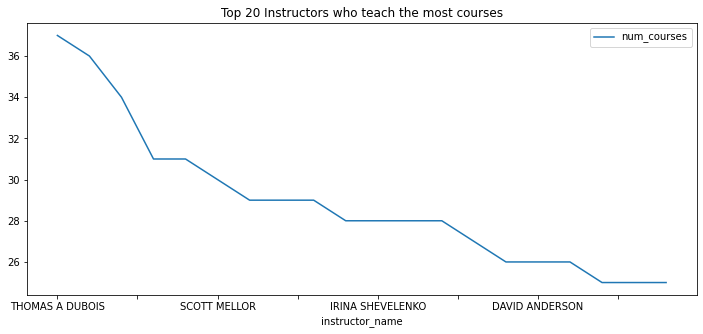

In [82]:
ic = pd.read_sql("""SELECT COUNT(DISTINCT(course_name)) AS num_courses, instructor_name
               FROM instructor_courses
               GROUP BY instructor_name
               HAVING COUNT(DISTINCT(course_name)) > 10
               ORDER BY COUNT(DISTINCT(course_name)) DESC
               LIMIT 20;""", conn)

ic.plot(x = 'instructor_name', y= 'num_courses', figsize=(12,5), 
        title ='Top 20 Instructors who teach the most courses')

So, 1249 instructors teach more than 10 distinct courses. An instructor named Thomas A Dubois teaches the maximum number of unique courses (37). Let us have a look at these courses.

In [32]:
pd.read_sql("""SELECT DISTINCT(course_name), instructor_name
               FROM instructor_courses
               WHERE instructor_name = 'THOMAS A DUBOIS';""", conn)

,course_name,instructor_name
0,Introduction to Folklore,THOMAS A DUBOIS
1,Bradley Roundtable Seminar,THOMAS A DUBOIS
2,Intro Cross-Cultrl Lit Form,THOMAS A DUBOIS
3,Intrnshp in Liberal Arts & Sci,THOMAS A DUBOIS
4,Directed Study,THOMAS A DUBOIS
5,Shamanism,THOMAS A DUBOIS
6,Comp Prob in Periods &,THOMAS A DUBOIS
7,Comp Prob in Periods & Movemnt,THOMAS A DUBOIS
8,Dir Stdy-Folklore Undergrad,THOMAS A DUBOIS
9,L&S Junior/Senior Seminar,THOMAS A DUBOIS


# Which courses are held in which rooms? 

In [33]:
pd.read_sql("""SELECT * FROM rooms
                       ; """, conn)

,uuid,facility_code,room_code
0,04368a56-c959-3e4b-8b3d-f4cc3538fea5,OFF CAMPUS,null
1,2cc50da3-ef0e-3572-a557-ca44930a0688,0032,0249
2,ebbf62b4-2ac3-356b-b0fa-7897f4446a17,0032,B101
3,ed828265-475b-31b4-b9a8-daec2a600449,0032,0549
4,b277dc8e-bab1-3a12-bc17-48d4a364d297,0032,0349
...,...,...,...
1345,d3ace3fc-91f9-30fc-ae40-be2dba4187a7,0103,0012
1346,41be44ad-3ef7-3184-ab45-bff1b924eb49,0085,0448
1347,0a0ae4a0-2139-35e0-a927-c495a296d174,1245,0B32
1348,c48297dd-bcaa-31ef-933f-fd6c41601595,0482,1236


In [34]:
course_rooms = pd.read_sql("""SELECT course_name, subject_name, room_code, facility_code 
                              FROM instructor_courses
                              INNER JOIN rooms
                              ON instructor_courses.room_uuid = rooms.uuid;""", conn)
course_rooms

,course_name,subject_name,room_code,facility_code
0,Cooperative Education Prog,Biomedical Engineering,null,OFF CAMPUS
1,Cooperative Education Prog,Chemical and Biological Engineering,null,OFF CAMPUS
2,Cooperative Education Prog,Civil and Environmental Engineering,null,OFF CAMPUS
3,Cooperative Education Prog,Electrical and Computer Engineering,null,OFF CAMPUS
4,Cooperative Education Prog,Engineering Mechanics and Astronautics,null,OFF CAMPUS
...,...,...,...,...
254935,Conservation Planning,Environmental Studies - Gaylord Nelson Institute,1170,0140
254936,Conservation Planning,Environmental Studies - Gaylord Nelson Institute,0175,0053
254937,Conservation Planning,Environmental Studies - Gaylord Nelson Institute,0175,0053
254938,Conservation Planning,Environmental Studies - Gaylord Nelson Institute,0175,0053


# Which courses are held off campus?

In [35]:
off_campus_courses = pd.read_sql("""SELECT DISTINCT(course_name), facility_code, room_code
                              FROM instructor_courses
                              INNER JOIN rooms
                              ON instructor_courses.room_uuid = rooms.uuid
                              WHERE facility_code = 'OFF CAMPUS';""", conn)
off_campus_courses

,course_name,facility_code,room_code
0,Cooperative Education Prog,OFF CAMPUS,null
1,Health Care: Intrdis Appr,OFF CAMPUS,null
2,Racial&Socioecon Persp-1st Yr,OFF CAMPUS,null
3,Technical Info Resources,OFF CAMPUS,null
4,Hum Response-Hlth & Illness I,OFF CAMPUS,null
...,...,...,...
235,Basic Chinese Conversatn II,OFF CAMPUS,null
236,Student Teaching in Chinese,OFF CAMPUS,null
237,St Teach Music Gen/Instr,OFF CAMPUS,null
238,St Teach Music Gen/Vocal,OFF CAMPUS,null


A total of 240 unique courses are held off campus. 

# Which instructors teach courses off campus? 

In [36]:
pd.read_sql("""SELECT DISTINCT(instructor_name), course_name, facility_code, room_code
                              FROM instructor_courses
                              INNER JOIN rooms
                              ON instructor_courses.room_uuid = rooms.uuid
                              WHERE facility_code = 'OFF CAMPUS';""", conn)

,instructor_name,course_name,facility_code,room_code
0,JOHN ARCHAMBAULT,Cooperative Education Prog,OFF CAMPUS,null
1,STEPHANIE KANN,Cooperative Education Prog,OFF CAMPUS,null
2,KATHY PREM,Cooperative Education Prog,OFF CAMPUS,null
3,PAUL LARSON,Health Care: Intrdis Appr,OFF CAMPUS,null
4,ADRIANNA GURAM,Racial&Socioecon Persp-1st Yr,OFF CAMPUS,null
...,...,...,...,...
1227,EMMA JOY JAMPOLE,St Teach Music Gen/Vocal,OFF CAMPUS,null
1228,LI-CHING HO,School-Based Practicum,OFF CAMPUS,null
1229,JEFFREY MADDOCK,School-Based Practicum,OFF CAMPUS,null
1230,MAXINE MCKINNEY DE ROYSTON,School-Based Practicum,OFF CAMPUS,null


We know that Thomas A Dubois teaches the maximum number of courses. Having a look at the rooms in which he taught :-

In [37]:
pd.read_sql("""SELECT (course_name), subject_name, instructor_name, room_code
                              FROM instructor_courses
                              INNER JOIN rooms
                              ON instructor_courses.room_uuid = rooms.uuid
                              WHERE instructor_name = 'THOMAS A DUBOIS';""", conn)

,course_name,subject_name,instructor_name,room_code
0,Introduction to Folklore,Folklore Program,THOMAS A DUBOIS,5231
1,Introduction to Folklore,Folklore Program,THOMAS A DUBOIS,0114
2,Introduction to Folklore,Folklore Program,THOMAS A DUBOIS,6104
3,Bradley Roundtable Seminar,Integrated Liberal Studies,THOMAS A DUBOIS,00B9
4,Bradley Roundtable Seminar,Integrated Liberal Studies,THOMAS A DUBOIS,00B9
...,...,...,...,...
93,Intensive Finnish I,Scandinavian Studies,THOMAS A DUBOIS,6109
94,Scandinavian Children's Lit,Library and Information Studies,THOMAS A DUBOIS,0119
95,Scandinavian Children's Lit,Literature in Translation,THOMAS A DUBOIS,0119
96,Scandinavian Children's Lit,Library and Information Studies,THOMAS A DUBOIS,0114


# Calculating the GPA

This dataset has a table called grade_distributions. Each row describes how a particular section of a course from a certain semester was graded - how many people got an A, AB, B, BC, C, D, and F, and other miscellaneous grades. 

In [38]:
pd.read_sql("""SELECT * FROM grade_distributions;""", conn)

,course_offering_uuid,section_number,n_count,c_count,f_count,cr_count,p_count,nw_count,other_count,bc_count,u_count,d_count,ab_count,a_count,s_count,i_count,b_count,nr_count
0,344b3ebe-da7e-314c-83ed-9425269695fd,1,0,0,0,0,0,0,0,0,0,0,0,105,0,0,0,0
1,f718e6cd-33f0-3c14-a9a6-834d9c3610a8,1,0,0,0,0,0,0,0,0,0,0,0,158,0,1,0,0
2,ea3b717c-d66b-30dc-8b37-964d9688295f,1,0,3,0,0,0,0,0,0,0,0,12,139,0,0,2,0
3,075da420-5f49-3dd0-93df-13e3c152e1b1,1,0,0,0,0,0,0,0,0,0,0,0,87,0,1,0,0
4,2b4e216d-a728-3713-8c7c-19afffc6b2fd,1,0,0,0,0,0,0,0,0,0,0,0,70,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193257,a7863f8b-0bbf-33e9-b857-2a42bb6b809f,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
193258,a7863f8b-0bbf-33e9-b857-2a42bb6b809f,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
193259,3573e335-e7be-33a6-b023-8704b3acc93b,1,0,0,0,0,0,0,0,0,0,0,7,18,0,0,0,0
193260,13278922-0726-3823-abda-dc14df03d8a6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The average GPA for the section can be calculated, as described by the UW Madison registrar.


GPA = (4.0 a_count + 3.5 ab_count + 3.0 b_count + 2.5 bc_count + 2 c_count + 1 d_count) / (total # of a, ab, b, bc, c, d, and f)

In [42]:
section_gpas = pd.read_sql("""SELECT course_offering_uuid, section_number,
                              (4 * a_count + 3.5 * ab_count + 3 * b_count + 2.5 * bc_count + 2 * c_count + 
                               1 * d_count) / (a_count + ab_count + b_count + bc_count + c_count + d_count + f_count)
                              AS gpa,
                              a_count + ab_count + b_count + bc_count + c_count + d_count + f_count AS num_grades
                              FROM grade_distributions;""", conn)
section_gpas

,course_offering_uuid,section_number,gpa,num_grades
0,344b3ebe-da7e-314c-83ed-9425269695fd,1,4.000000,105
1,f718e6cd-33f0-3c14-a9a6-834d9c3610a8,1,4.000000,158
2,ea3b717c-d66b-30dc-8b37-964d9688295f,1,3.910256,156
3,075da420-5f49-3dd0-93df-13e3c152e1b1,1,4.000000,87
4,2b4e216d-a728-3713-8c7c-19afffc6b2fd,1,4.000000,70
...,...,...,...,...
193257,a7863f8b-0bbf-33e9-b857-2a42bb6b809f,42,NaN,0
193258,a7863f8b-0bbf-33e9-b857-2a42bb6b809f,43,NaN,0
193259,3573e335-e7be-33a6-b023-8704b3acc93b,1,3.860000,25
193260,13278922-0726-3823-abda-dc14df03d8a6,7,NaN,0


In [44]:
cursor.execute("DROP VIEW IF EXISTS section_gpas")
cursor.execute("""
  CREATE VIEW
  section_gpas (course_offering_uuid, section_number, gpa, num_grades )
  
  AS
  
  SELECT course_offering_uuid, section_number,
                              (4 * a_count + 3.5 * ab_count + 3 * b_count + 2.5 * bc_count + 2 * c_count + 
                               1 * d_count) / (a_count + ab_count + b_count + bc_count + c_count + d_count + f_count)
                              AS gpa,
                              a_count + ab_count + b_count + bc_count + c_count + d_count + f_count AS num_grades
                              FROM grade_distributions
  """)

In [51]:
pd.read_sql("""
  SELECT *
  FROM instructors i
  INNER JOIN teachings t ON i.id = t.instructor_id
  INNER JOIN sections s ON  t.section_uuid = s.uuid 
  INNER JOIN section_gpas gpas ON gpas.course_offering_uuid = s.course_offering_uuid AND gpas.section_number = s.number
  LIMIT 5
""", conn)

,id,name,instructor_id,section_uuid,uuid,course_offering_uuid,section_type,number,room_uuid,schedule_uuid,course_offering_uuid,section_number,gpa,num_grades
0,761703,JOHN ARCHAMBAULT,761703,45adf63c-48c9-3659-8561-07556d2d4ddf,45adf63c-48c9-3659-8561-07556d2d4ddf,344b3ebe-da7e-314c-83ed-9425269695fd,FLD,1,null,f2d66a4d-0c08-3b48-abf6-649fffd7ae90,344b3ebe-da7e-314c-83ed-9425269695fd,1,4.000000,105
1,761703,JOHN ARCHAMBAULT,761703,c6280e23-5e43-3859-893e-540d94993529,c6280e23-5e43-3859-893e-540d94993529,f718e6cd-33f0-3c14-a9a6-834d9c3610a8,FLD,1,null,f2d66a4d-0c08-3b48-abf6-649fffd7ae90,f718e6cd-33f0-3c14-a9a6-834d9c3610a8,1,4.000000,158
2,761703,JOHN ARCHAMBAULT,761703,9395dc21-15d1-3fab-8d1f-6f3fe6114c48,9395dc21-15d1-3fab-8d1f-6f3fe6114c48,ea3b717c-d66b-30dc-8b37-964d9688295f,FLD,1,04368a56-c959-3e4b-8b3d-f4cc3538fea5,f2d66a4d-0c08-3b48-abf6-649fffd7ae90,ea3b717c-d66b-30dc-8b37-964d9688295f,1,3.910256,156
3,3677061,STEPHANIE KANN,3677061,b99e440b-39db-350a-81eb-b6eb1bd8b0bc,b99e440b-39db-350a-81eb-b6eb1bd8b0bc,ea3b717c-d66b-30dc-8b37-964d9688295f,FLD,1,null,f2d66a4d-0c08-3b48-abf6-649fffd7ae90,ea3b717c-d66b-30dc-8b37-964d9688295f,1,3.910256,156
4,761703,JOHN ARCHAMBAULT,761703,ca1c841f-41d5-3298-bd25-01c65751f150,ca1c841f-41d5-3298-bd25-01c65751f150,ea3b717c-d66b-30dc-8b37-964d9688295f,FLD,1,null,f2d66a4d-0c08-3b48-abf6-649fffd7ae90,ea3b717c-d66b-30dc-8b37-964d9688295f,1,3.910256,156


In [53]:
pd.read_sql(""" SELECT id, name,
  SUM(gpas.gpa * gpas.num_grades) / SUM(gpas.num_grades) as avg_gpa,
  AVG(gpas.num_grades),
  SUM(gpas.num_grades)
  
  FROM instructors i
  INNER JOIN teachings t ON i.id = t.instructor_id
  INNER JOIN sections s ON s.uuid = t.section_uuid
  INNER JOIN section_gpas gpas ON gpas.course_offering_uuid = s.course_offering_uuid AND gpas.section_number = s.number
  GROUP BY i.id
  ORDER BY avg_gpa DESC
  LIMIT 10
""", conn)

,id,name,avg_gpa,AVG(gpas.num_grades),SUM(gpas.num_grades)
0,993578,SABINE PELLETT,4.0,12.000000,12
1,985735,NATHAN JEFFREY BLACK,4.0,5.200000,26
2,984473,JULIA BATES,4.0,16.000000,16
3,973368,DAVID BENJAMIN,4.0,5.500000,11
4,950999,LAURENCE DAVIS,4.0,21.500000,43
5,944557,MICHAEL STOKER,4.0,0.200000,1
6,940639,MAUREEN MCQUIRK,4.0,10.692308,139
7,940301,KATHLEEN HORNING,4.0,9.666667,29
8,928459,BARRY HARTUP,4.0,4.322581,134
9,917379,NICHOLAS J BALSTER,4.0,5.333333,16


We can see that many instructors give GPA's of 4.0. However the average number of students per section for many instructors is quite low. Also, many have graded very few students, thereby leading to a higher average GPA.

Creating a query to display only those instructors who have graded more than 300 students and have an average section size of more than 50.

In [54]:
pd.read_sql(""" SELECT id, name,
  SUM(gpas.gpa * gpas.num_grades) / SUM(gpas.num_grades) AS avg_gpa,
  AVG(gpas.num_grades) AS avg_num_grades,
  SUM(gpas.num_grades) AS total_num_grades
  
  FROM instructors i
  INNER JOIN teachings t ON i.id = t.instructor_id
  INNER JOIN sections s ON s.uuid = t.section_uuid
  INNER JOIN section_gpas gpas ON gpas.course_offering_uuid = s.course_offering_uuid AND gpas.section_number = s.number
  
  GROUP BY i.id
  HAVING AVG(gpas.num_grades) >= 50
  AND SUM(gpas.num_grades) >= 300
  ORDER BY avg_gpa DESC
""", conn)

,id,name,avg_gpa,avg_num_grades,total_num_grades
0,5899203,ROBERT BRICKNER,4.000000,319.000000,319
1,1665377,JUSTIN LINDGREN,3.998544,206.000000,1030
2,5696677,OLIVIA SALZMAN,3.998305,295.000000,885
3,5690750,KRISTOFER GILMORE,3.998305,295.000000,885
4,5516573,THOMAS MACALUSO,3.998305,295.000000,885
...,...,...,...,...,...
820,387784,CONCETTA M. GOMEZ,2.522453,50.722222,913
821,2602031,RONALD W DICKEY,2.513140,90.375000,723
822,939288,SHARON THOMA,2.508273,295.714286,16560
823,3631548,DEBORAH KERR,2.486068,161.500000,323


# Finding the top 10 instructors who give the highest average GPA's

In [55]:
top_instructors = pd.read_sql(""" SELECT id, name,
  SUM(gpas.gpa * gpas.num_grades) / SUM(gpas.num_grades) AS avg_gpa,
  AVG(gpas.num_grades) AS avg_num_grades,
  SUM(gpas.num_grades) AS total_num_grades
  
  FROM instructors i
  INNER JOIN teachings t ON i.id = t.instructor_id
  INNER JOIN sections s ON s.uuid = t.section_uuid
  INNER JOIN section_gpas gpas ON gpas.course_offering_uuid = s.course_offering_uuid AND gpas.section_number = s.number
  
  GROUP BY i.id
  HAVING AVG(gpas.num_grades) >= 50
  AND SUM(gpas.num_grades) >= 300
  ORDER BY avg_gpa DESC
  LIMIT 10
""", conn)

,id,name,avg_gpa,avg_num_grades,total_num_grades
0,5899203,ROBERT BRICKNER,4.000000,319.00,319
1,1665377,JUSTIN LINDGREN,3.998544,206.00,1030
2,5696677,OLIVIA SALZMAN,3.998305,295.00,885
3,5690750,KRISTOFER GILMORE,3.998305,295.00,885
4,5516573,THOMAS MACALUSO,3.998305,295.00,885
5,5522011,KEVIN SCHOELLER,3.997350,283.00,566
6,5515273,ALLISON SCHWEICKERT,3.997350,283.00,566
7,5888042,O'SHAE BEST,3.995822,179.50,359
8,4394657,ERNEST JENNINGS,3.990588,106.25,425
9,5292310,DARIN OLSON,3.987770,117.20,1758


In [56]:
cursor.execute("DROP VIEW IF EXISTS top_instructors")
cursor.execute("""
  CREATE VIEW
  top_instructors (id, name, avg_gpa, avg_num_grades, total_num_grades )
  
  AS
  
  SELECT id, name,
  SUM(gpas.gpa * gpas.num_grades) / SUM(gpas.num_grades) AS avg_gpa,
  AVG(gpas.num_grades) AS avg_num_grades,
  SUM(gpas.num_grades) AS total_num_grades
  
  FROM instructors i
  INNER JOIN teachings t ON i.id = t.instructor_id
  INNER JOIN sections s ON s.uuid = t.section_uuid
  INNER JOIN section_gpas gpas ON gpas.course_offering_uuid = s.course_offering_uuid AND gpas.section_number = s.number
  
  GROUP BY i.id
  HAVING AVG(gpas.num_grades) >= 50
  AND SUM(gpas.num_grades) >= 300
  ORDER BY avg_gpa DESC
  LIMIT 10
  """)

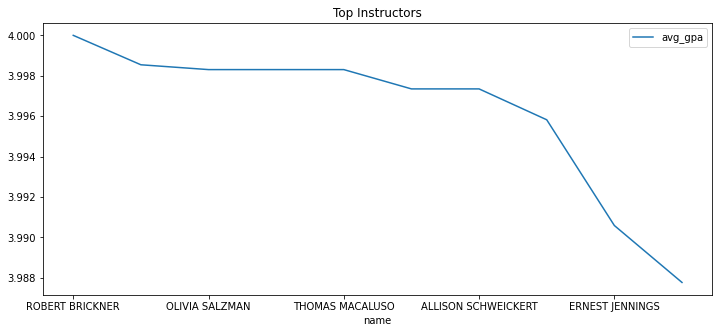

In [73]:
top_instructors.plot(x='name',y=['avg_gpa'],figsize=(12,5),title='Top Instructors')

# Finding the instructors who give the lowest GPA's on average 

In [75]:
lowest_gpa_instructors = pd.read_sql(""" SELECT id, name,
  SUM(gpas.gpa * gpas.num_grades) / SUM(gpas.num_grades) AS avg_gpa,
  AVG(gpas.num_grades) AS avg_num_grades,
  SUM(gpas.num_grades) AS total_num_grades
  
  FROM instructors i
  INNER JOIN teachings t ON i.id = t.instructor_id
  INNER JOIN sections s ON s.uuid = t.section_uuid
  INNER JOIN section_gpas gpas ON gpas.course_offering_uuid = s.course_offering_uuid AND gpas.section_number = s.number
  
  GROUP BY i.id
  HAVING AVG(gpas.num_grades) >= 50
  AND SUM(gpas.num_grades) >= 300
  ORDER BY avg_gpa 
  LIMIT 10
""", conn)
lowest_gpa_instructors

,id,name,avg_gpa,avg_num_grades,total_num_grades
0,2600356,STEVEN BAUMAN,2.474308,69.000000,759
1,3631548,DEBORAH KERR,2.486068,161.500000,323
2,939288,SHARON THOMA,2.508273,295.714286,16560
3,2602031,RONALD W DICKEY,2.513140,90.375000,723
4,387784,CONCETTA M. GOMEZ,2.522453,50.722222,913
5,4147777,JON WILLITS,2.525373,167.500000,335
6,4907701,EMILY KLINE,2.528184,159.666667,479
7,4172262,ADRIANA NENCIU,2.533044,76.916667,923
8,4001532,HAN PETERS,2.536232,138.000000,1104
9,5475082,CHRISTINE OFFERMAN,2.545558,62.714286,439


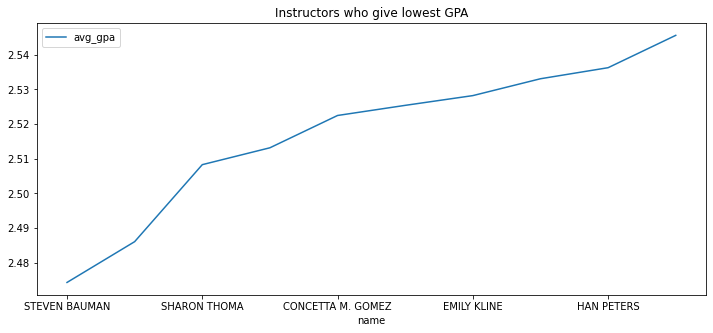

In [76]:
lowest_gpa_instructors.plot(x='name',y=['avg_gpa'],figsize=(12,5),title='Instructors who give lowest GPA')